    Sprawozdanie 3.          EAIiIB, Informatyka, Metody Numeryczne          Jakub Zyngier

Zadanie 1.

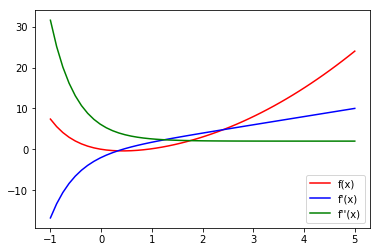

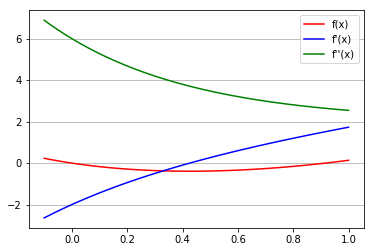

Przedział dla bisekcji a=-2 i b=0.5 oraz a=0.5 i b=2
Przedział dla Newtona a=-1 oraz a=0.5
Przedział dla siecznych a=-2 i b=0.5 oraz a=0.5 i b=2


In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

def y1(t): 
    return math.e**(-2*t)+t**2-1

def y2(t): 
    return 2*t-2*math.e**(-2*t)

def y3(t): 
    return 2+4*math.e**(-2*t)

t = np.linspace(-1, 5)

plt.plot(t, [y1(i) for i in t], 'r', label="f(x)")
plt.plot(t, [y2(i) for i in t], 'b', label="f'(x)")
plt.plot(t, [y3(i) for i in t], 'g', label="f''(x)")
plt.legend()
plt.show()

t = np.linspace(-0.1, 1)
plt.plot(t, [y1(i) for i in t], 'r', label="f(x)")
plt.plot(t, [y2(i) for i in t], 'b', label="f'(x)")
plt.plot(t, [y3(i) for i in t], 'g', label="f''(x)")
plt.grid(b=None, axis='y')
plt.legend()
plt.show()

print("Przedział dla bisekcji a=-2 i b=0.5 oraz a=0.5 i b=2")
print("Przedział dla Newtona a=-1 oraz a=0.5")
print("Przedział dla siecznych a=-2 i b=0.5 oraz a=0.5 i b=2")

Zadanie 2.

In [93]:
import time
import math
from scipy import optimize


def y1(t): 
    return math.e**(-2*t)+t**2-1

def bisekcja(f, poczatek, koniec, epsilon, max_iteracji):
    epsilon = abs(epsilon)
    max_interacji_tmp = max_iteracji
    
    if f(poczatek) == 0:
        return poczatek, 1
    elif f(koniec) == 0:
        return koniec, 1
    elif f(poczatek)*f(koniec)<0:
        while (koniec-poczatek) >= epsilon and max_interacji_tmp>0:
            pierwiastek = (koniec + poczatek) / 2.0 
            if f(poczatek)*f(pierwiastek)<0:
                koniec = pierwiastek         
            elif f(pierwiastek)*f(koniec)<0: 
                poczatek = pierwiastek          
            else:
                break    
            max_interacji_tmp-=1
            
            if max_interacji_tmp==0:
                return "Przekroczono liczbe iteracji", max_iteracji
    else:
        return ("f(a) i f(b) muszą być różnych znaków!"), 1
       
    return pierwiastek, (max_iteracji-max_interacji_tmp+1)

print("")
print("Bisekcja /własna funkcja/:")

start_time = time.perf_counter()
pierwiastek_m_11, iteracje = bisekcja(y1, -1, 0.3, 10**(-10), 100)
time_m_11 = (time.perf_counter() - start_time)

print(pierwiastek_m_11, ",", iteracje ," otrzymany w czasie: %s sek" % time_m_11)

start_time = time.perf_counter()
pierwiastek_m_12, iteracje = bisekcja(y1, 0.5, 2, 10**(-10), 100)
time_m_12 = (time.perf_counter() - start_time)

print(pierwiastek_m_12, ",", iteracje ," otrzymany w czasie: %s sek" % time_m_12)

print("")
print("Bisekcja /funkcja wpudowana/:")

start_time = time.perf_counter()
pierwiastek_w_11 = optimize.bisect(y1, -1, 0.5)
time_w_11 = (time.perf_counter() - start_time)

print(pierwiastek_w_11 ," otrzymany w czasie: %s sek" % time_w_11)

start_time = time.perf_counter()
pierwiastek_w_12 = optimize.bisect(y1, 0.5, 2)
time_w_12 = (time.perf_counter() - start_time)

print(pierwiastek_w_12 ," otrzymany w czasie: %s sek" % time_w_12)


Bisekcja /własna funkcja/:
-5.2386888416987834e-11 , 35  otrzymany w czasie: 0.00014408500010176795 sek
0.9165625830355566 , 35  otrzymany w czasie: 0.00013342700003704522 sek

Bisekcja /funkcja wpudowana/:
4.547473508864641e-13  otrzymany w czasie: 8.921399967221078e-05 sek
0.9165625831051329  otrzymany w czasie: 7.224000000860542e-05 sek


Zadanie 3.

In [31]:
import time
import math
from scipy import optimize

def y1(t): 
    return math.e**(-2*t)+t**2-1

def y2(t): 
    return 2*t-2*math.e**(-2*t)

def styczne(f, f_prim, poczatek, epsilon, max_iteracji):
    iteracje = max_iteracji;
    if f(poczatek) == 0:
        return poczatek, 1
    else:
        while abs(f(poczatek))>epsilon and iteracje>0:
            poczatek = poczatek - f(poczatek)/f_prim(poczatek)
            iteracje-=1
            
            if iteracje==0:
                return "Przekroczono liczbe iteracji", max_iteracji
            
        return poczatek, (max_iteracji-iteracje)
    
    return "Error", 1

print("")
print("Styczne (Newtona-Raphsona) /własna funkcja/:")
start_time = time.perf_counter()
pierwiastek_m_21, iteracje = styczne(y1, y2, -1, 10**(-10), 100)
time_m_21 = (time.perf_counter() - start_time)

print(pierwiastek_m_21, ",", iteracje ," otrzymany w czasie: %s sek" % time_m_21)

start_time = time.perf_counter()
pierwiastek_m_22, iteracje = styczne(y1, y2, 0.5, 10**(-10), 100)
time_m_22 = (time.perf_counter() - start_time)

print(pierwiastek_m_22, ",", iteracje ," otrzymany w czasie: %s sek" % time_m_22)

print("")
print("Newton /funkcja wpudowana/:")

start_time = time.perf_counter()
pierwiastek_w_21 = optimize.newton(y1, -1)
time_w_21 = (time.perf_counter() - start_time)

print(pierwiastek_w_21 ," otrzymany w czasie: %s sek" % time_w_21)

start_time = time.perf_counter()
pierwiastek_w_22 = optimize.newton(y1, 0.5)
time_w_22 = (time.perf_counter() - start_time)

print(pierwiastek_w_22 ," otrzymany w czasie: %s sek" % time_w_22)


Styczne (Newtona-Raphsona) /własna funkcja/:
-5.753992934998626e-18 , 7  otrzymany w czasie: 0.00021316599998044694 sek
0.9165625831138303 , 6  otrzymany w czasie: 0.00017645499997342995 sek

Newton /funkcja wpudowana/:
-9.209436085819023e-18  otrzymany w czasie: 0.00018316500006676506 sek
0.9165625831056979  otrzymany w czasie: 0.0001472430000148961 sek


Zadanie 4.

In [91]:
import math
import time
from scipy import optimize

def y1(t): 
    return math.e**(-2*t)+t**2-1

def sieczne(f, poczatek, poczatek_2, epsilon, max_iteracji):
    iteracje = max_iteracji-1;
    if f(poczatek) == 0:
        return poczatek, 1
    elif f(poczatek_2) == 0:
        return poczatek_2, 1
    else:
        while iteracje>0 and abs(poczatek-poczatek_2)>epsilon:
            if abs(f(poczatek)-f(poczatek_2))<epsilon:
                return "Zle punkty startowe", max_iteracji-iteracje
            x=poczatek-f(poczatek)*((poczatek-poczatek_2)/(f(poczatek)-f(poczatek_2)))
            if abs(abs(x - poczatek)<epsilon):
                return x, (max_iteracji-iteracje)
            
            poczatek_2, poczatek = poczatek, x
            
            iteracje-=1
    
            if iteracje==0:
                return "Przekroczona liczba obiegów", max_iteracji
    
        return poczatek, (max_iteracji-iteracje)
            
    
    return "Error", 1

print("")
print("Sieczne /własna funkcja/:")

start_time = time.perf_counter()
pierwiastek_m_31, iteracje = sieczne(y1, -0.5, 0.3, 10**(-10), 100)
time_m_31 = (time.perf_counter() - start_time)

print(pierwiastek_m_31, ",", iteracje ," otrzymany w czasie: %s sek" % time_w_31)

start_time = time.perf_counter()
pierwiastek_m_32, iteracje = sieczne(y1, 0.5, 2, 10**(-10), 100)
time_m_32 = (time.perf_counter() - start_time)

print(pierwiastek_m_32, ",", iteracje ," otrzymany w czasie: %s sek" % time_w_32)

print("")
print("Newton /funkcja wpudowana/:")

start_time = time.perf_counter()
pierwiastek_w_31 = optimize.newton(y1, -1)
time_w_31 = (time.perf_counter() - start_time)

print(pierwiastek_w_31 ," otrzymany w czasie: %s sek" % time_w_31)

start_time = time.perf_counter()
pierwiastek_w_31 = optimize.newton(y1, 0.5)
time_w_32 = (time.perf_counter() - start_time)

print(pierwiastek_w_31 ," otrzymany w czasie: %s sek" % time_w_32)


Sieczne /własna funkcja/:
1.7861059944833443e-17 , 9  otrzymany w czasie: 0.00011566300008780672 sek
0.9165625831056982 , 9  otrzymany w czasie: 9.829300006458652e-05 sek

Newton /funkcja wpudowana/:
-9.209436085819023e-18  otrzymany w czasie: 0.00010816200028784806 sek
0.9165625831056979  otrzymany w czasie: 0.00013500500017471495 sek


In [94]:
liczbaMiejscPoPrzecinku = 8;
print("Porównanie powyższych metod")
print("\t\t\t czas\t\twynik\t\t\t czas2\t\t wynik2")
print("bisekcji (własna)\t",round(time_m_11,liczbaMiejscPoPrzecinku),"  ",pierwiastek_m_11,"\t",round(time_m_12,liczbaMiejscPoPrzecinku),"\t",pierwiastek_m_12)
print("bisect (wbudowana)\t",round(time_w_11,liczbaMiejscPoPrzecinku),"    ",pierwiastek_w_11,"\t",round(time_w_12,liczbaMiejscPoPrzecinku),"\t",pierwiastek_w_12)
print("statycznych (własna)\t",round(time_m_21,liczbaMiejscPoPrzecinku),"  ",pierwiastek_m_21,"\t",round(time_m_22,liczbaMiejscPoPrzecinku),"\t",pierwiastek_m_22)
print("newton (wbudowana)\t",round(time_w_21,liczbaMiejscPoPrzecinku),"  ",pierwiastek_w_21,"\t",round(time_w_22,liczbaMiejscPoPrzecinku),"\t",pierwiastek_w_22)
print("siecznych (własna)\t",round(time_m_31,liczbaMiejscPoPrzecinku),"   ",pierwiastek_m_31,"\t",round(time_m_32,liczbaMiejscPoPrzecinku),"\t",pierwiastek_m_32)

Porównanie powyższych metod
			 czas		wynik			 czas2		 wynik2
bisekcji (własna)	 0.00014409    -5.2386888416987834e-11 	 0.00013343 	 0.9165625830355566
bisect (wbudowana)	 8.921e-05      4.547473508864641e-13 	 7.224e-05 	 0.9165625831051329
statycznych (własna)	 0.00021317    -5.753992934998626e-18 	 0.00017645 	 0.9165625831138303
newton (wbudowana)	 0.00018317    -9.209436085819023e-18 	 0.00014724 	 0.9165625831056979
siecznych (własna)	 0.00017448     1.7861059944833443e-17 	 0.00015908 	 0.9165625831056982
